In [1]:
# Now that the data has been mostly (note: dummy terms still need to be created), we can do some exploratory data analysis
# Will still add and drop variables as discovered during this part

In [2]:
# import all of our libraries and the cleaned file
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
cleaned = pd.read_csv('cleaned.csv')

In [5]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 82 columns):
Unnamed: 0                 1449 non-null int64
MSSubClass                 1449 non-null int64
MSZoning                   1449 non-null object
LotArea                    1449 non-null int64
Street                     1449 non-null object
Alley                      1449 non-null object
LandContour                1449 non-null object
LotConfig                  1449 non-null object
Neighborhood               1449 non-null object
Condition1                 1449 non-null object
BldgType                   1449 non-null object
HouseStyle                 1449 non-null object
OverallQual                1449 non-null int64
OverallCond                1449 non-null int64
YearBuilt                  1449 non-null int64
YearRemodAdd               1449 non-null int64
RoofStyle                  1449 non-null object
Exterior1st                1449 non-null object
MasVnrType                 1449 non-

In [6]:
cleaned.head()

,Unnamed: 0,MSSubClass,MSZoning,LotArea,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,LogSale,SaleTypeNew,PoolQCNon,HasGarage,GarageCond*GarageQual,Fireplaces*FireplaceQu,ElectricalSBr,HeatingGas,HasBasement,BsmtCond*BsmtQual,ExterCond*ExterQual,LandSlopeGtl,LotShapeReg,OverallQual*OverallCond
0,0,60,RL,8450,Pave,None,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,BrkFace,196.0,4,3,PConc,4,3,0,GLQ,706,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,None,0,2,2008,Normal,208500,12.247694,0,1,1,9,0,1,1,1,12,12,1,1,35
1,1,20,RL,9600,Pave,None,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,None,0.0,3,3,CBlock,4,3,3,ALQ,978,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,None,0,5,2007,Normal,181500,12.109011,0,1,1,9,3,1,1,1,12,9,1,1,48
2,2,60,RL,11250,Pave,None,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,BrkFace,162.0,4,3,PConc,4,3,1,GLQ,486,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,None,0,9,2008,Normal,223500,12.317167,0,1,1,9,3,1,1,1,12,12,1,0,35
3,3,70,RL,9550,Pave,None,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,None,0.0,3,3,BrkTil,3,4,0,ALQ,216,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,11.849398,0,1,1,9,4,1,1,1,12,9,1,0,35
4,4,60,RL,14260,Pave,None,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,BrkFace,350.0,4,3,PConc,4,3,2,GLQ,655,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,None,0,12,2008,Normal,250000,12.429216,0,1,1,9,3,1,1,1,12,12,1,0,40


In [7]:
# dropping the unnamed 0 column
cleaned.drop('Unnamed: 0', axis=1,inplace=True)

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 129., 118.,
         75.,  60.,  64.,  48.,  36.,  36.,  24.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   1.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

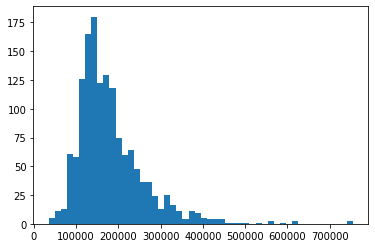

In [8]:
plt.hist(cleaned['SalePrice'],bins=50)

(array([  2.,   2.,   1.,   0.,   0.,   0.,   2.,   3.,   4.,   3.,   5.,
          1.,   5.,  21.,  22.,  23.,  18.,  29.,  58.,  56.,  65., 100.,
        122.,  93.,  90.,  81., 107.,  89.,  61.,  54.,  58.,  50.,  46.,
         42.,  22.,  29.,  22.,  13.,  13.,  13.,   7.,   5.,   3.,   1.,
          2.,   2.,   2.,   0.,   0.,   2.]),
 array([10.46024211, 10.52172673, 10.58321134, 10.64469596, 10.70618058,
        10.7676652 , 10.82914982, 10.89063444, 10.95211906, 11.01360367,
        11.07508829, 11.13657291, 11.19805753, 11.25954215, 11.32102677,
        11.38251138, 11.443996  , 11.50548062, 11.56696524, 11.62844986,
        11.68993448, 11.75141909, 11.81290371, 11.87438833, 11.93587295,
        11.99735757, 12.05884219, 12.12032681, 12.18181142, 12.24329604,
        12.30478066, 12.36626528, 12.4277499 , 12.48923452, 12.55071913,
        12.61220375, 12.67368837, 12.73517299, 12.79665761, 12.85814223,
        12.91962684, 12.98111146, 13.04259608, 13.1040807 , 13.16556532,
 

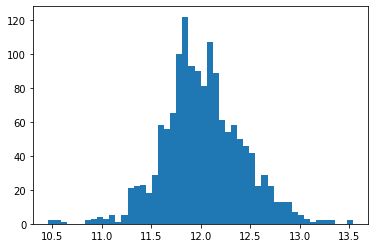

In [9]:
plt.hist(cleaned['LogSale'], bins = 50)

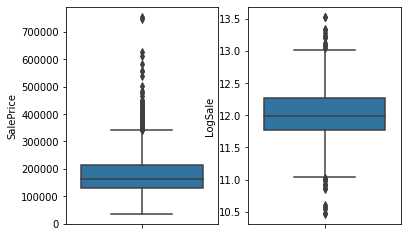

In [10]:
fig, axs = plt.subplots(1,2)
sns.boxplot(y=cleaned['SalePrice'], ax = axs[0])
sns.boxplot(y=cleaned['LogSale'], ax = axs[1])

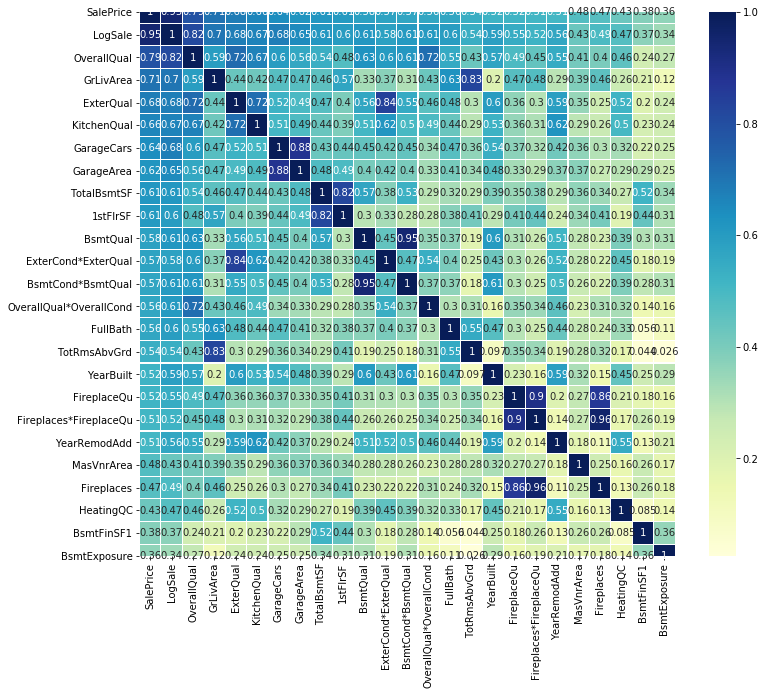

In [11]:
# redoing correlation matrix with cleaned variables to see if there are any changes
# important to note that categorical variables won't be seen in this, which is why we manually inspected them before
# specific variable correlation matrix
# k is number of top variables
k = 25
cols = cleaned.corr().nlargest(k, 'SalePrice')['SalePrice'].index 
  
cm = np.corrcoef(cleaned[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values,
           annot = True) 

In [12]:
top_25 = list(cols)

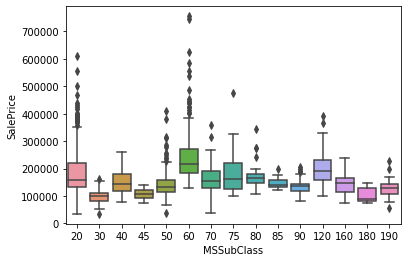

In [13]:
sns.boxplot(x=cleaned['MSSubClass'], y=cleaned['SalePrice'])

In [14]:
# creating a list of numerical variables to be turned into dummies
num_to_dummy = []
num_to_dummy.append('MSSubClass')

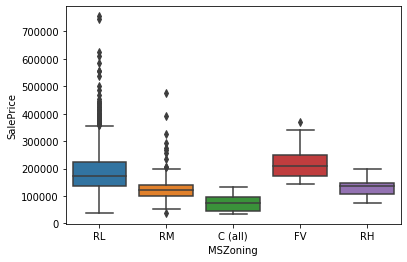

In [15]:
sns.boxplot(x=cleaned['MSZoning'], y=cleaned['SalePrice'])

In [16]:
# time to take a look at some of the time variables
time_var = ['YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt','SalePrice', 'LogSale']

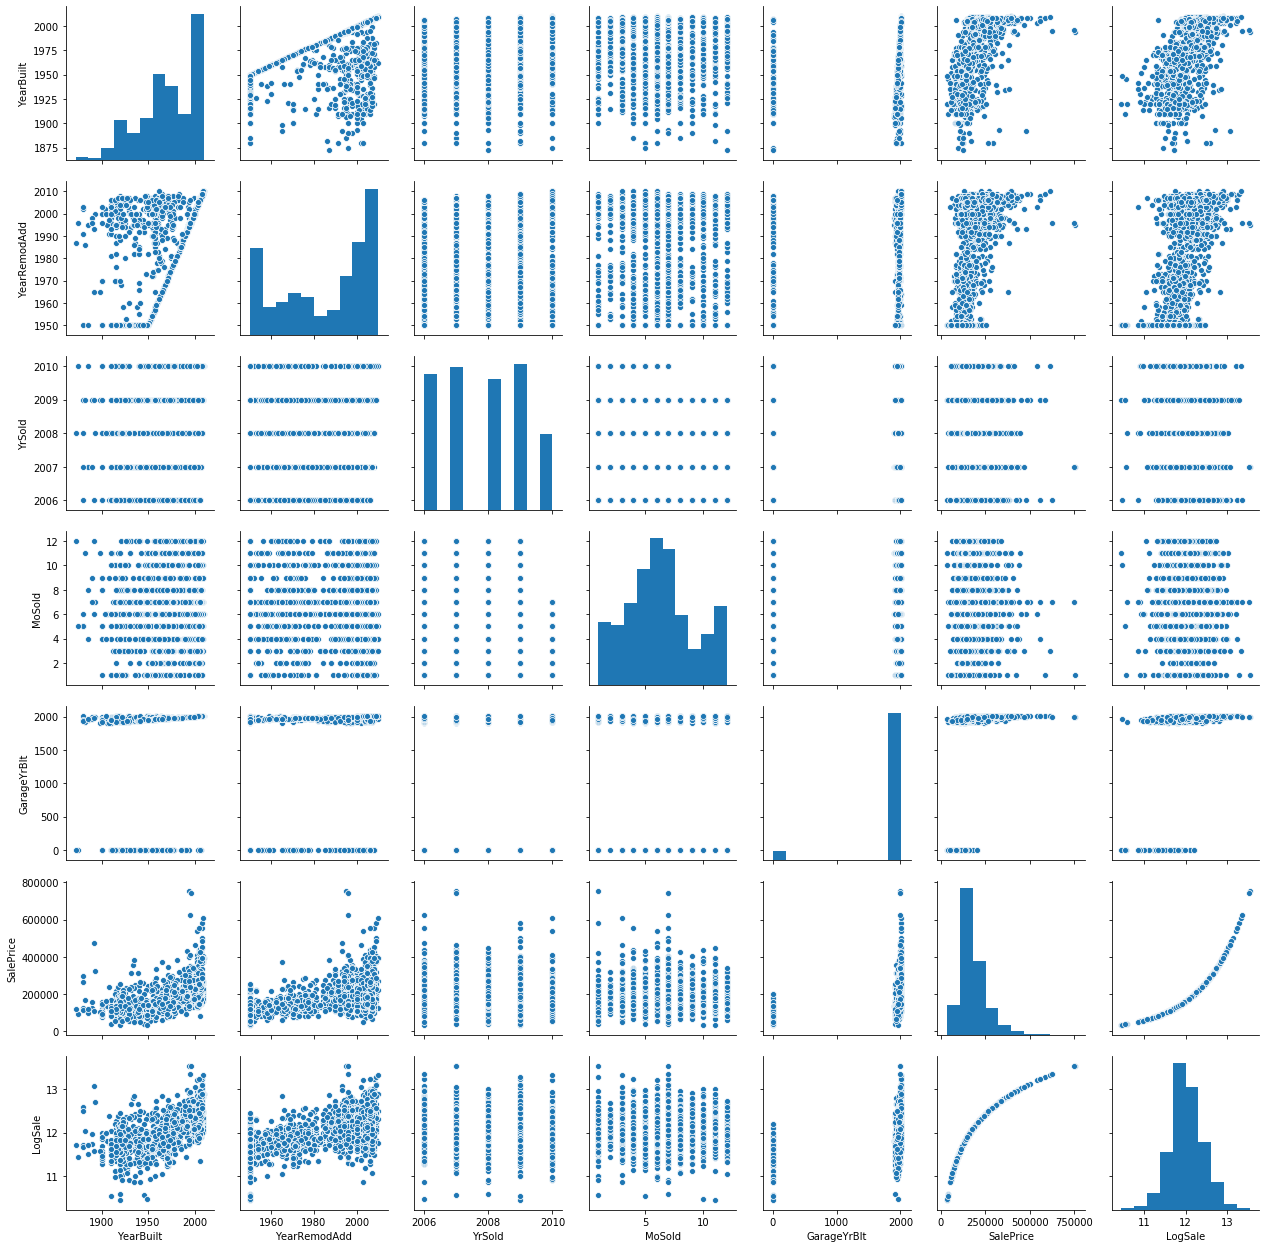

In [17]:
sns.pairplot(cleaned[time_var])

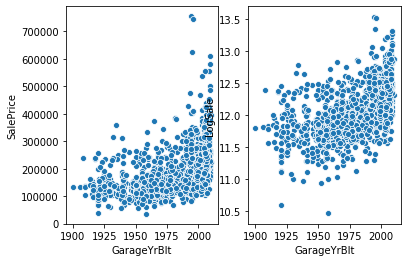

In [18]:
# we can see there is an upwards trend for yearbuilt and year remodeled, but appears mostly linear in LogSale model. let's
# take a look at the garage year build category, adn then boxplot the month and yearsold variables
fig, axs = plt.subplots(1,2)
sns.scatterplot(x=cleaned[cleaned['GarageYrBlt']>0]['GarageYrBlt'], y=cleaned[cleaned['GarageYrBlt']>0]['SalePrice'], ax = axs[0])
sns.scatterplot(x=cleaned[cleaned['GarageYrBlt']>0]['GarageYrBlt'], y=cleaned[cleaned['GarageYrBlt']>0]['LogSale'], ax = axs[1])

In [19]:
#creating a second copy of cleaned in order to prune outliers for the prediction model
trimmed = pd.read_csv('cleaned.csv')

In [20]:
trimmed.head()

,Unnamed: 0,MSSubClass,MSZoning,LotArea,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,LogSale,SaleTypeNew,PoolQCNon,HasGarage,GarageCond*GarageQual,Fireplaces*FireplaceQu,ElectricalSBr,HeatingGas,HasBasement,BsmtCond*BsmtQual,ExterCond*ExterQual,LandSlopeGtl,LotShapeReg,OverallQual*OverallCond
0,0,60,RL,8450,Pave,None,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,BrkFace,196.0,4,3,PConc,4,3,0,GLQ,706,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,None,0,2,2008,Normal,208500,12.247694,0,1,1,9,0,1,1,1,12,12,1,1,35
1,1,20,RL,9600,Pave,None,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,None,0.0,3,3,CBlock,4,3,3,ALQ,978,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,None,0,5,2007,Normal,181500,12.109011,0,1,1,9,3,1,1,1,12,9,1,1,48
2,2,60,RL,11250,Pave,None,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,BrkFace,162.0,4,3,PConc,4,3,1,GLQ,486,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,None,0,9,2008,Normal,223500,12.317167,0,1,1,9,3,1,1,1,12,12,1,0,35
3,3,70,RL,9550,Pave,None,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,None,0.0,3,3,BrkTil,3,4,0,ALQ,216,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,11.849398,0,1,1,9,4,1,1,1,12,9,1,0,35
4,4,60,RL,14260,Pave,None,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,BrkFace,350.0,4,3,PConc,4,3,2,GLQ,655,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,None,0,12,2008,Normal,250000,12.429216,0,1,1,9,3,1,1,1,12,12,1,0,40


In [21]:
# appears to have a slightly non-linear relationship, going to add a squared version
cleaned['GarageYrBltSq'] = cleaned['GarageYrBlt']**2
trimmed['GarageYrBltSq'] = trimmed['GarageYrBlt']**2

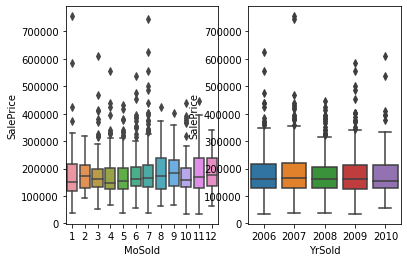

In [22]:
fig, axs = plt.subplots(1,2)
sns.boxplot(x=cleaned['MoSold'], y=cleaned['SalePrice'], ax = axs[0])
sns.boxplot(x=cleaned['YrSold'], y=cleaned['SalePrice'], ax = axs[1])

In [23]:
cleaned.groupby('MoSold')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
MoSold,,,,,,,,
1,58.0,183256.258621,121381.083473,39300.0,118250.0,151650.0,215500.00,755000.0
2,51.0,177595.372549,53447.100647,93000.0,128850.0,173000.0,212450.00,320000.0
3,104.0,182570.115385,87143.859874,52500.0,132875.0,163200.0,200125.00,611657.0
4,141.0,171503.262411,77147.323106,68400.0,124000.0,147000.0,202900.00,555000.0
5,201.0,171943.945274,69013.786901,37900.0,127000.0,153000.0,202500.00,430000.0
6,253.0,177395.735178,69453.085881,55993.0,136000.0,163000.0,204000.00,538000.0
7,234.0,186331.192308,91772.125395,40000.0,132625.0,165195.0,212975.00,745000.0
8,121.0,184649.776860,73520.416818,64500.0,126000.0,173900.0,239686.00,426000.0
9,62.0,191339.387097,76281.582006,67000.0,135000.0,182950.0,229864.00,402861.0


In [24]:
# appears theres not a significant relationship here, however, it is worth noting that the Spring to Summer months generate
# vastly more sales than the other periods, with winter being the lowest number of sales.

In [25]:
# generating a list of the SF variables to inspect their relationships
sf_vars = []

for x in list(cleaned.columns):
    if 'sf' in x.lower():
        sf_vars.append(x)
    elif 'area' in x.lower():
        sf_vars.append(x)
sf_vars

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'PoolArea']

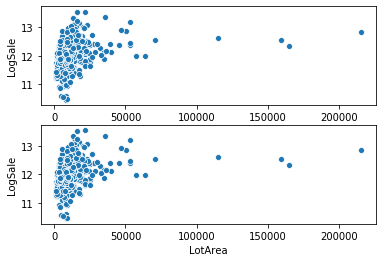

In [26]:
# missing porch variables, so will inspect those later
fig, axs = plt.subplots(2,1)
sns.scatterplot(x=cleaned['LotArea'], y=cleaned['LogSale'], ax = axs[0])
sns.scatterplot(x=cleaned['LotArea'], y=cleaned['LogSale'], ax = axs[1])

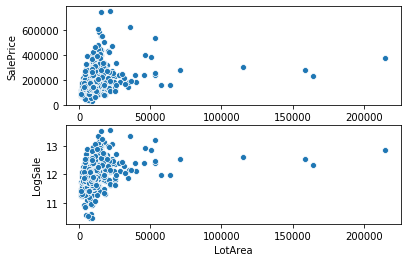

In [27]:
fig, axs = plt.subplots(2,1)
sns.scatterplot(x=trimmed['LotArea'], y=trimmed['SalePrice'], ax = axs[0])
sns.scatterplot(x=trimmed['LotArea'], y=trimmed['LogSale'], ax = axs[1])

In [28]:
# positive relationship with lot area until about 25,000 feet. To account for this, going to create bins. This will 
# allow the model to deal with this relationship when testing on unknown data
cleaned['LotAreaBins'] = pd.cut(x=cleaned['LotArea'], 
                                bins = [0,4999,9999,14999,19999,24999,1000000], labels = ['<5000','<10000',
                                                                                          '<15000','<20000','<25000','>25000'])
trimmed['LotAreaBins'] = pd.cut(x=trimmed['LotArea'], 
                                bins = [0,4999,9999,14999,19999,24999,1000000], labels = ['<5000','<10000',
                                                                                          '<15000','<20000','<25000','>25000'])


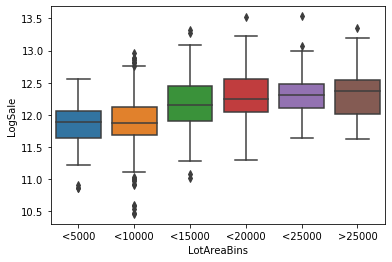

In [29]:
sns.boxplot(x=trimmed['LotAreaBins'], y=trimmed['LogSale'])

In [30]:
def area_relationship(col,df):
    fig, axs = plt.subplots(2,1)
    sns.scatterplot(x=df[df[col]>0][col],y=df[df[col]>0]['SalePrice'], ax = axs[0])
    sns.scatterplot(x=df[df[col]>0][col],y=df[df[col]>0]['LogSale'], ax = axs[1])

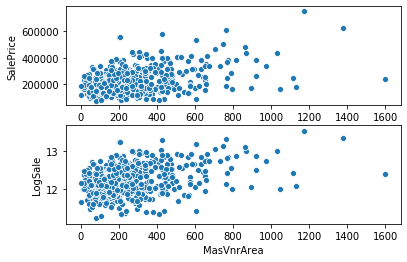

In [31]:
area_relationship('MasVnrArea', cleaned)

In [32]:
# going to remove rows above 1100 for MasVnrArea
trimmed.drop(trimmed[trimmed['MasVnrArea']>1100].index, axis=0, inplace=True)

In [33]:
# need to create HasMasVnr for the model to incorporate relationship of MasVnrArea
def has_dummy(x):
    if x == 0 or x == 'None':
        return 0
    else:
        return 1
cleaned['HasMasVnr'] = cleaned['MasVnrType'].apply(has_dummy)


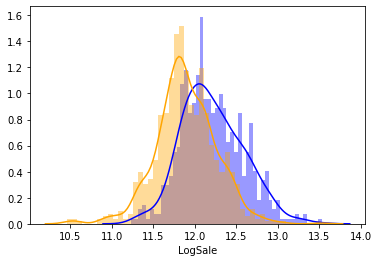

In [34]:
sns.distplot(cleaned[cleaned['HasMasVnr']==1]['LogSale'], bins=50, label = 'HasMasVnr', color = 'blue')
sns.distplot(cleaned[cleaned['HasMasVnr']==0]['LogSale'], bins=50, label = 'Does Not', color = 'orange')

In [35]:
# will also do for Has2ndFlr
cleaned['Has2ndFlr'] = cleaned['2ndFlrSF'].apply(has_dummy)
trimmed['Has2ndFlr'] = trimmed['2ndFlrSF'].apply(has_dummy)

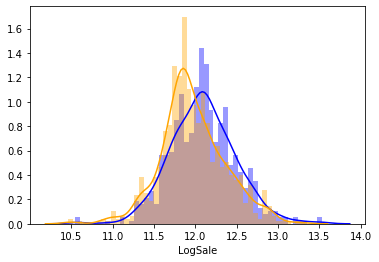

In [36]:
sns.distplot(cleaned[cleaned['Has2ndFlr']==1]['LogSale'], bins=50, label = 'HasMasVnr', color = 'blue')
sns.distplot(cleaned[cleaned['Has2ndFlr']==0]['LogSale'], bins=50, label = 'Does Not', color = 'orange')

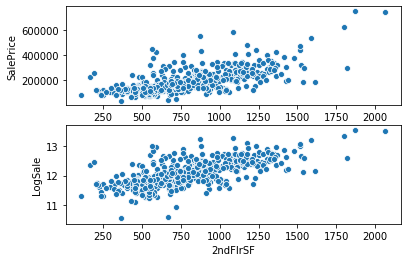

In [37]:
area_relationship('2ndFlrSF', cleaned)

In [38]:
trimmed.drop(trimmed[trimmed['2ndFlrSF']>1750].index, axis=0, inplace=True)

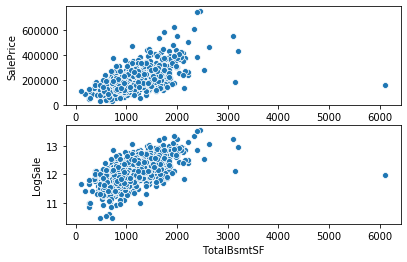

In [39]:
area_relationship('TotalBsmtSF', cleaned)

In [40]:
trimmed.drop(trimmed[trimmed['TotalBsmtSF']>4000].index, axis=0, inplace=True)

In [41]:
cleaned['TotalBsmtSFNegSq'] = -(cleaned['TotalBsmtSF']**2)
trimmed['TotalBsmtSFNegSq'] = -(trimmed['TotalBsmtSF']**2)

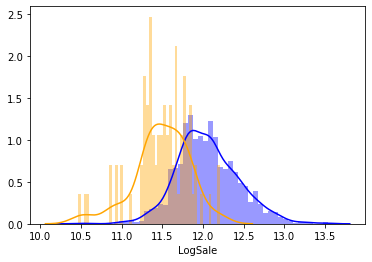

In [42]:
sns.distplot(cleaned[cleaned['HasGarage']==1]['LogSale'], bins=50, label = 'HasMasVnr', color = 'blue')
sns.distplot(cleaned[cleaned['HasGarage']==0]['LogSale'], bins=50, label = 'Does Not', color = 'orange')

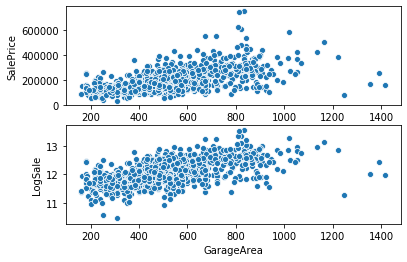

In [43]:
area_relationship('GarageArea',cleaned)

In [44]:
cleaned['GarageAreaBins'] = pd.cut(x=cleaned['GarageArea'], 
                                      bins = [-1,1,299,599,899,1199,10000], labels = ['0','<300','<600','<900','<1200','<10000'])
trimmed['GarageAreaBins'] = pd.cut(x=trimmed['GarageArea'], 
                                      bins = [-1,1,299,599,899,1199,10000], labels = ['0','<300','<600','<900','<1200','<10000'])

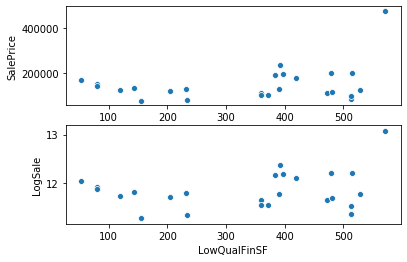

In [45]:
area_relationship('LowQualFinSF', cleaned)

In [46]:
# Will drop lowqualfinSF
cleaned.drop('LowQualFinSF', axis=1, inplace=True)
trimmed.drop('LowQualFinSF', axis=1, inplace=True)

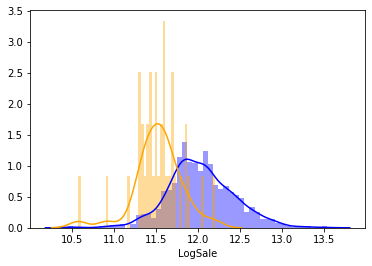

In [47]:
sns.distplot(cleaned[cleaned['HasBasement']==1]['LogSale'], bins=50, label = 'HasMasVnr', color = 'blue')
sns.distplot(cleaned[cleaned['HasBasement']==0]['LogSale'], bins=50, label = 'Does Not', color = 'orange')

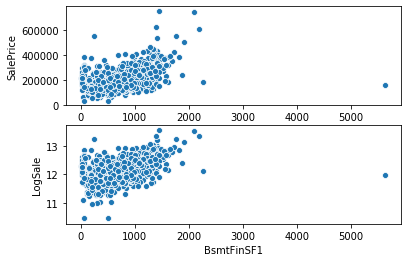

In [48]:
area_relationship('BsmtFinSF1', cleaned)

In [49]:
# plt.boxplot(trimmed[trimmed['BsmtFinSF1']>0]['BsmtFinSF1'])

In [50]:
trimmed.drop(trimmed[trimmed['BsmtFinSF1']>1800].index, axis=0, inplace=True)

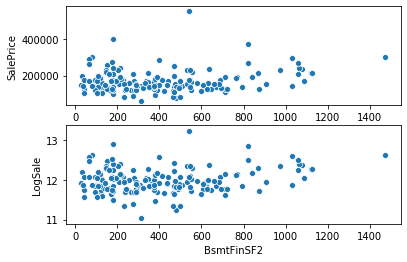

In [51]:
area_relationship('BsmtFinSF2', cleaned)

In [52]:
# much less data, not much explanatory power
cleaned.drop('BsmtFinSF2', axis=1, inplace=True)
trimmed.drop('BsmtFinSF2', axis=1, inplace=True)

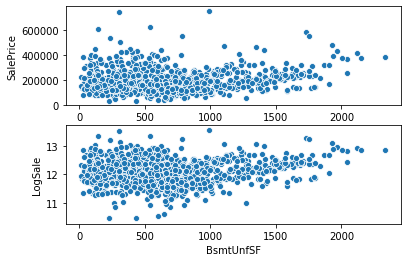

In [53]:
area_relationship('BsmtUnfSF', cleaned)

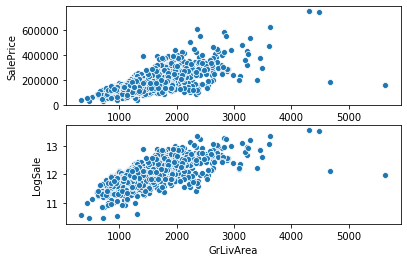

In [54]:
area_relationship('GrLivArea', cleaned)

In [55]:
trimmed.drop(trimmed[trimmed['GrLivArea']>4000].index, axis=0, inplace=True)

In [56]:
cleaned['GrLivAreaNegSq'] = -(cleaned['GrLivArea']**2)
trimmed['GrLivAreaNegSq'] = -(trimmed['GrLivArea']**2)

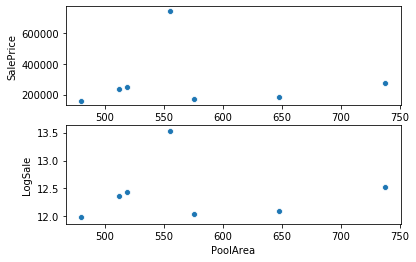

In [57]:
area_relationship('PoolArea', cleaned)

In [58]:
cleaned.drop('PoolArea', axis=1, inplace=True)
trimmed.drop('PoolArea', axis=1, inplace=True)

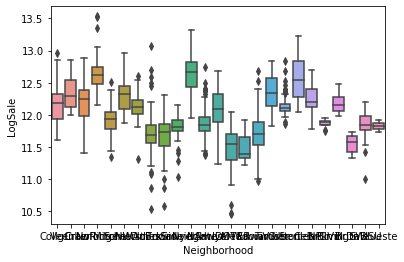

In [59]:
# going back and looking at some important categorical variables based on description
#Neighborhood has big impact as expected
sns.boxplot(x=cleaned['Neighborhood'], y=cleaned['LogSale'])

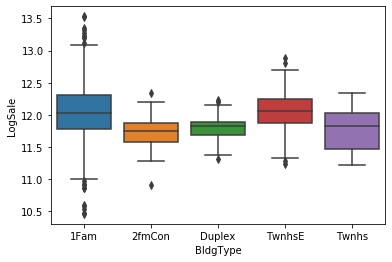

In [60]:
sns.boxplot(x=cleaned['BldgType'], y=cleaned['LogSale'])

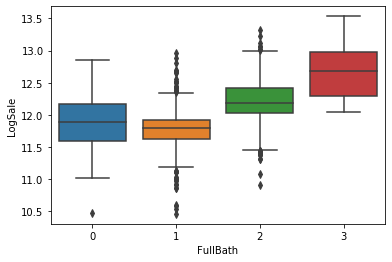

In [61]:
sns.boxplot(x=cleaned['FullBath'], y=cleaned['LogSale'])

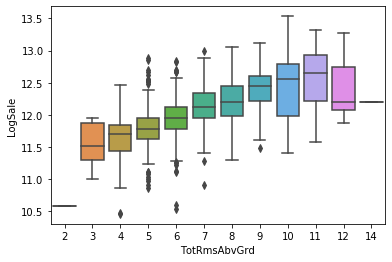

In [62]:
sns.boxplot(x=cleaned['TotRmsAbvGrd'], y=cleaned['LogSale'])

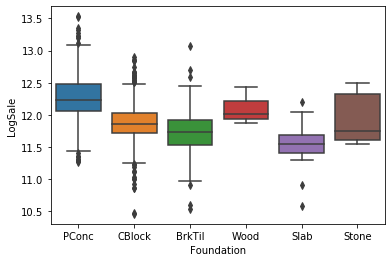

In [63]:
sns.boxplot(x=cleaned['Foundation'], y=cleaned['LogSale'])

In [64]:
# Time to deal with the porch variables. Appears they are all SF of the porches, so we'll make has variables for them
porch_var = []
for x in list(cleaned.columns):
    if "porch" in x.lower():
        porch_var.append(x)
    elif "deck" in x.lower():
        porch_var.append(x)
porch_var

['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [65]:
def create_has_variable(col, df):
    if 'SF' in col:
        new_var_name = 'Has' + col[:len(col)-2]
    else:
        new_var_name = 'Has' + col
    
    df[new_var_name] = df[col].apply(has_dummy)

In [66]:
create_has_variable('WoodDeckSF', cleaned)
create_has_variable('OpenPorchSF', cleaned)
create_has_variable('EnclosedPorch', cleaned)
create_has_variable('3SsnPorch', cleaned)
create_has_variable('ScreenPorch', cleaned)

In [67]:
create_has_variable('WoodDeckSF', trimmed)
create_has_variable('OpenPorchSF', trimmed)
create_has_variable('EnclosedPorch', trimmed)
create_has_variable('3SsnPorch', trimmed)
create_has_variable('ScreenPorch', trimmed)

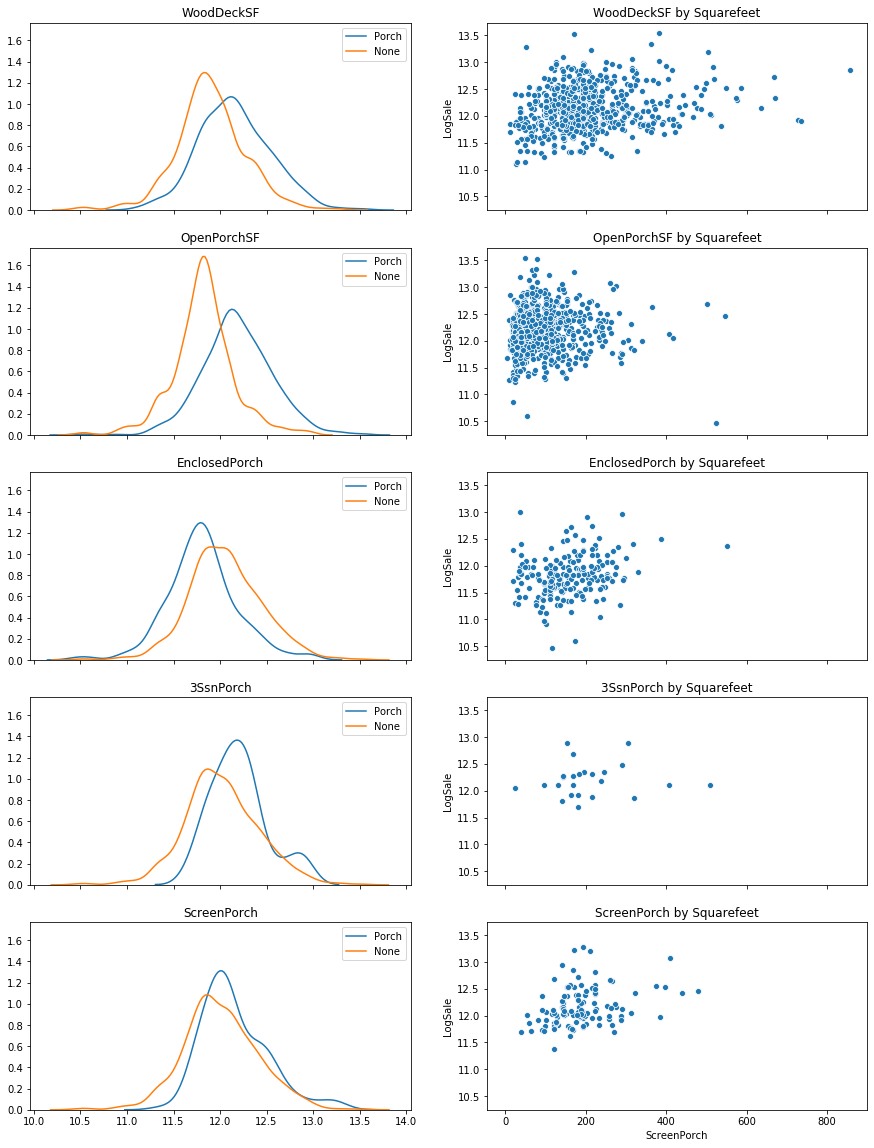

In [68]:
fig, axs = plt.subplots(5, 2, sharex='col', sharey='col', figsize=(15,20))

col = 0
for x in porch_var:
    if 'SF' in x:
        porch_dummy_name = 'Has' + x[:len(x)-2]
    else:
        porch_dummy_name = 'Has' + x
    sns.kdeplot(cleaned[cleaned[porch_dummy_name]==1]['LogSale'], ax=axs[col,0], label='Porch')
    sns.kdeplot(cleaned[cleaned[porch_dummy_name]==0]['LogSale'], ax=axs[col,0], label = "None")
    sns.scatterplot(cleaned[cleaned[porch_dummy_name]==1][x],y=cleaned[cleaned[porch_dummy_name]==1]['LogSale'], ax = axs[col,1])
    axs[col,0].set_title(x)
    axs[col,1].set_title(x + " by Squarefeet")
    col+=1

In [69]:
trimmed.drop(trimmed[trimmed['WoodDeckSF']>600].index, axis=0, inplace=True)
trimmed.drop(trimmed[trimmed['OpenPorchSF']>500].index, axis=0, inplace=True)
trimmed.drop(trimmed[trimmed['EnclosedPorch']>500].index, axis=0, inplace=True)

In [70]:
# Show similar pattern to other similar variables. Slight differences for having the variable, but increased price with size
# However, this will correlate with overall living area so effects will be diluted

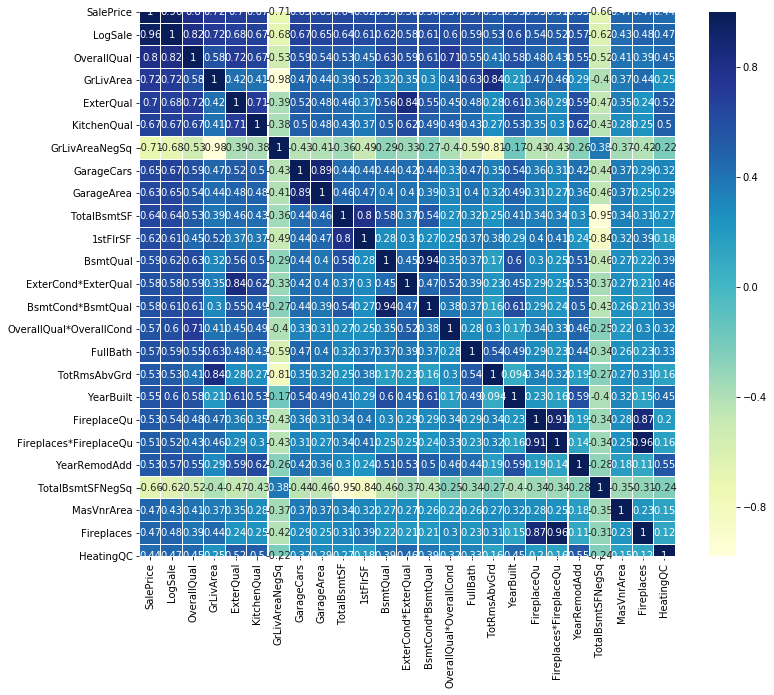

In [71]:
# redoing correlation matrix with trimmed variables to see if there are any changes, also making absolute
# important to note that categorical variables won't be seen in this, which is why we manually inspected them before
# specific variable correlation matrix
# k is number of top variables
k = 25
cols = abs(cleaned.corr()).nlargest(k, 'SalePrice')['SalePrice'].index 
  
cm = np.corrcoef(trimmed[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values,
           annot = True) 

In [72]:
ready = trimmed.copy()
file_path = 'ml_ready.csv'
ready.to_csv(file_path)